## Title : Handwritten Digit Recognition


In [1]:
import tensorflow as tf



In [2]:
m=tf.keras.datasets.mnist

In [3]:
(x_t,y_t),(x_te,y_te)=m.load_data()


In [4]:
x_t.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt 

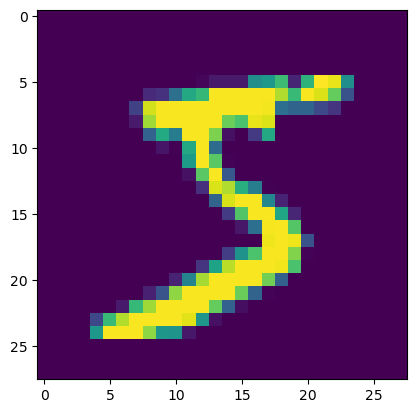

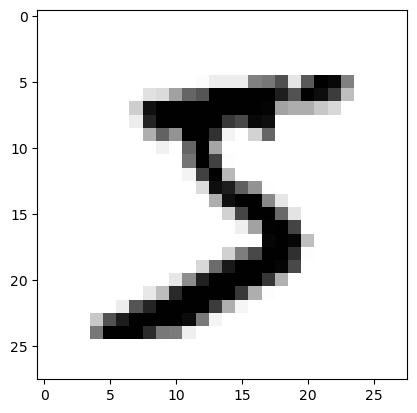

In [6]:
plt.imshow(x_t[0])
plt.show()
plt.imshow(x_t[0],cmap=plt.cm.binary)

In [7]:
print(x_t[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

 # normakizing the data|pre processing

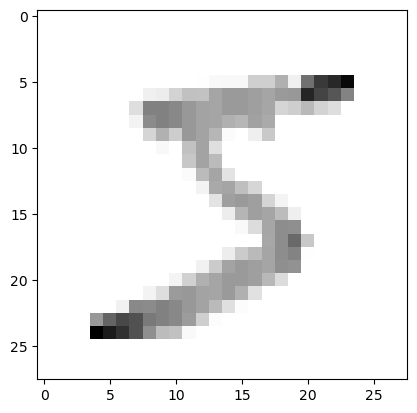

In [8]:
x_t=tf.keras.utils.normalize(x_t,axis=1)
x_te=tf.keras.utils.normalize(x_te,axis=1)
plt.imshow(x_t[0],cmap=plt.cm.binary)


# after normalization

In [9]:
print(x_t[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_t[0])


5


# resizing image to make if sutiable for apply convolution operation

In [11]:
import numpy as np
i_s=28
x_tr=np.array(x_t).reshape(-1,i_s,i_s,1)
x_ter=np.array(x_te).reshape(-1,i_s,i_s,1)
print("Traning Samples dimention",x_tr.shape)
print("Testing Samples dimention",x_ter.shape)

Traning Samples dimention (60000, 28, 28, 1)
Testing Samples dimention (10000, 28, 28, 1)



# creating a deep neural network
# Training on 60,000 samples

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [13]:
m=Sequential()#creating a nureal network now
# 1st convolution layer 0 1 2 3 (60000,28,28,1)
m.add(Conv2D(64, (3,3), input_shape= x_tr.shape[1:]))
m.add(Activation("relu"))#activation function to make it non-linear
m.add(MaxPooling2D(pool_size=(2,2)))#converting 2d to 1d

# 2nd convolution layer
m.add(Conv2D(64 ,(3,3)))
m.add(Activation("relu"))
m.add(MaxPooling2D(pool_size=(2,2)))

# 3rd convolution layer
m.add(Conv2D(64 ,(3,3)))
m.add(Activation("relu"))
m.add(MaxPooling2D(pool_size=(2,2)))

#Fully connected layer 1
m.add(Flatten())
m.add(Dense(64))
m.add(Activation("relu"))

# Fully connected layer 2
m.add(Dense(32))
m.add(Activation("relu"))

# last fully connected layer
m.add(Dense(10))
m.add(Activation("softmax"))# activation function changed to softmax




In [14]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [15]:
m.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [16]:
m.fit(x_tr,y_t,epochs=5,validation_split=0.3)#traning model

Epoch 1/5


1313/1313 [==============================] - 21s 14ms/step - loss: 0.3208 - accuracy: 0.8982 - val_loss: 0.1180 - val_accuracy: 0.9651
Epoch 2/5
1313/1313 [==============================] - 18s 13ms/step - loss: 0.1035 - accuracy: 0.9676 - val_loss: 0.0951 - val_accuracy: 0.9710
Epoch 3/5
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0748 - accuracy: 0.9770 - val_loss: 0.0668 - val_accuracy: 0.9791
Epoch 4/5
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0572 - accuracy: 0.9829 - val_loss: 0.0746 - val_accuracy: 0.9803
Epoch 5/5
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0474 - accuracy: 0.9847 - val_loss: 0.0549 - val_accuracy: 0.9839


In [17]:
# evoluating on test data set mnist
t_l,te_a =m.evaluate(x_ter,y_te)
print("Test loss on 10000 samples",t_l)
print("validation accuracy on 10000 samples",te_a)

313/313 [==============================] - 2s 6ms/step - loss: 0.0558 - accuracy: 0.9837
Test loss on 10000 samples 0.0557861253619194
validation accuracy on 10000 samples 0.9836999773979187


In [18]:
p=m.predict([x_ter])

313/313 [==============================] - 2s 5ms/step


In [19]:
print(p)

[[8.6324246e-09 2.6794914e-06 2.1126652e-06 ... 9.9997425e-01
  3.4045172e-06 4.6534988e-06]
 [2.4011191e-05 6.5013120e-07 9.9980551e-01 ... 2.7953874e-05
  2.0728456e-05 2.1805226e-06]
 [1.1908354e-06 9.9997258e-01 4.6292835e-06 ... 6.2031372e-06
  2.1650135e-06 5.8249435e-07]
 ...
 [2.5258046e-07 5.4233669e-07 7.0216686e-08 ... 3.6921053e-06
  1.1933013e-05 5.6714180e-06]
 [1.0459993e-04 5.5061281e-07 3.4177381e-07 ... 1.1909497e-07
  2.2236346e-03 1.1294116e-04]
 [2.0089297e-04 7.8216942e-07 7.0981914e-05 ... 6.2720176e-07
  1.3621310e-04 2.6916401e-05]]


In [20]:
print(np.argmax(p[0]))

7


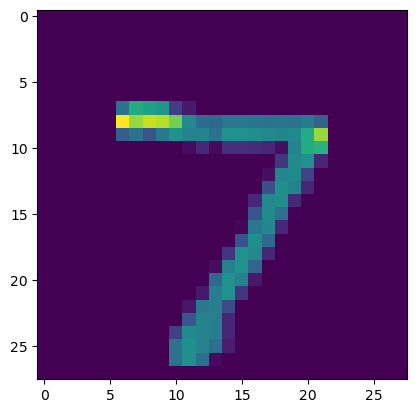

In [21]:
plt.imshow(x_te[0])

In [22]:
import cv2

In [36]:
img=cv2.imread('mac.png')



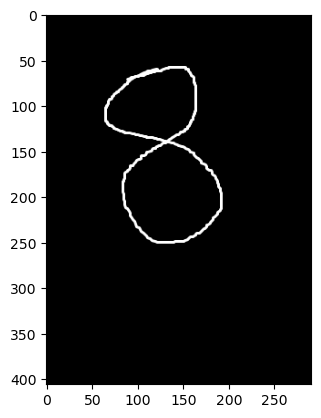

In [37]:
plt.imshow(img)

In [38]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [39]:
res=cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)

In [40]:
gray.shape

(406, 291)

In [41]:
res.shape

(28, 28)

In [42]:
n=tf.keras.utils.normalize(res, axis= 1)

In [43]:
n=np.array(n).reshape(-1,28,28,1)

In [44]:
n.shape

(1, 28, 28, 1)

In [45]:
p=m.predict(n)


1/1 [==============================] - 0s 47ms/step


In [46]:
print(np.argmax(p))

8
